In [21]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [22]:
books = pd.read_csv('datasets/books.csv', index_col = 'bookID', error_bad_lines = False)
books.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [23]:
print (books.shape)
print()
books.info()

(13714, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13714 entries, 1 to 47709
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13714 non-null  object 
 1   authors             13714 non-null  object 
 2   average_rating      13714 non-null  float64
 3   isbn                13714 non-null  object 
 4   isbn13              13714 non-null  int64  
 5   language_code       13714 non-null  object 
 6   # num_pages         13714 non-null  int64  
 7   ratings_count       13714 non-null  int64  
 8   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.0+ MB


There is no null value in any column.

In [24]:
# datatype present in the dataset
books.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [25]:
# converting the datatype of the 'isbn13' column
books['isbn13'] = books['isbn13'].astype('object')

In [26]:
books['authors'].replace(to_replace = 'J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace = True)
books.rename(columns = {'# num_pages' : 'Total_pages'}, inplace = True)

# droping the columns with the isbn numbers
books.drop(['isbn', 'isbn13'], axis = 1, inplace = True)

books.head(5)

,title,authors,average_rating,language_code,Total_pages,ratings_count,text_reviews_count
bookID,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,eng,652,1944099,26249
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,1996446,27613
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,eng,320,5629932,70390
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,eng,435,2149872,33964


## Let's find out the number of unique languages in this dataset

In [27]:
books.language_code.value_counts()

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
nl           7
rus          7
swe          6
glg          4
lat          3
tur          3
enm          3
cat          3
ara          2
srp          1
heb          1
nor          1
msa          1
gla          1
ale          1
wel          1
dan          1
Name: language_code, dtype: int64

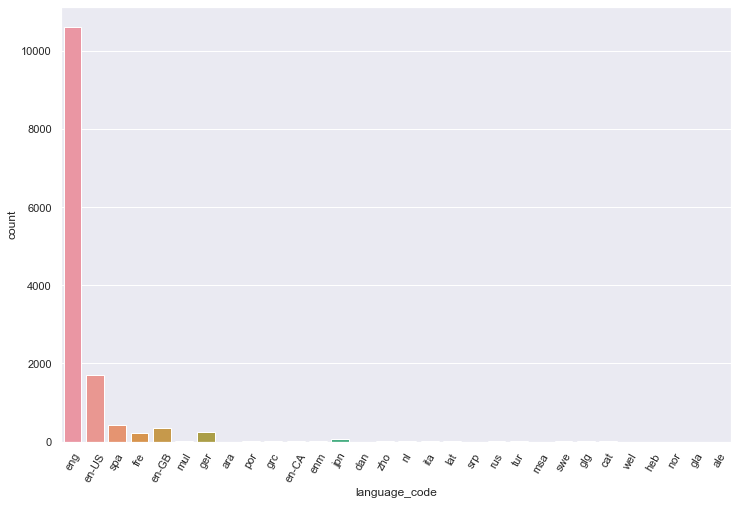

In [28]:
plt.xticks(rotation = 60)
sns.countplot(x = 'language_code', data = books)

## The top 10 authors with most number of books

In [29]:
books.authors.value_counts().head(10)

Agatha Christie                69
Stephen King                   66
Orson Scott Card               48
Rumiko Takahashi               46
P.G. Wodehouse                 42
Terry Brooks                   40
Piers Anthony                  34
Margaret Weis-Tracy Hickman    33
Dan Simmons                    32
Sandra Brown                   31
Name: authors, dtype: int64

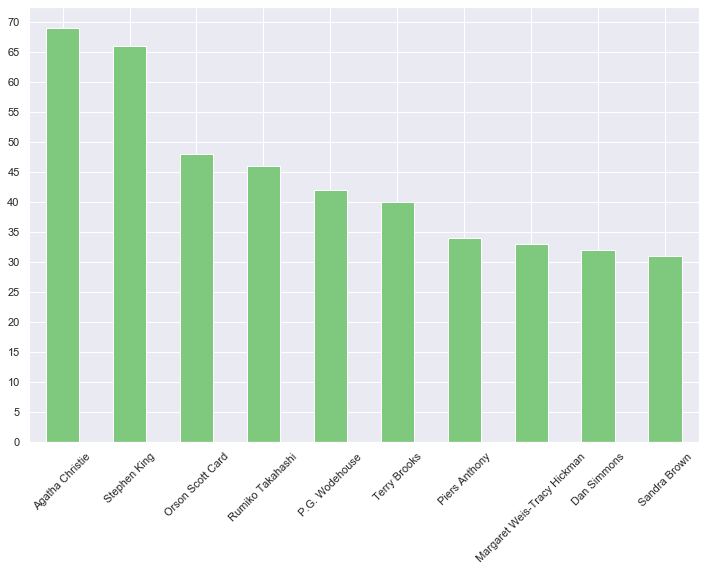

In [30]:
books.authors.value_counts().sort_values(ascending = False).head(10).plot.bar(figsize = (12,8), colormap = 'Accent', rot = 45, yticks = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70])

Agatha christie has the highest number of books closely follwed by Stephen king. The top 5 authors with the most number of books are- Agatha Christie, Stephen King, Orson Scott Card, Rumiko Takahashi and P.G.Wodehouse.

## Top 10 rated books

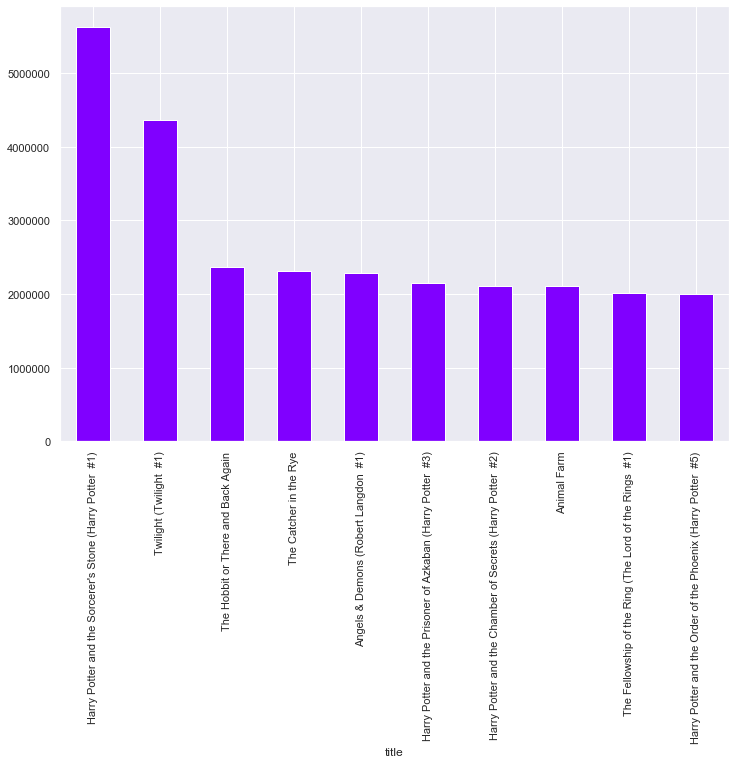

In [31]:
rated_10 = books.sort_values('ratings_count', ascending = False).set_index('title').head(10)
rated_10.ratings_count.plot(kind = 'bar', colormap = 'rainbow', figsize = (12,8))

4 out of top 10 most rated books are from the Harry Potter Series. But the difference in the number of ratings in quite high. Also, 4 out of total 10 books are the first books of their respective series.
Difference in ratings between the first and the second book of the Harry Potter series is quite high, thus we can say that the first parts are well received then their successors.

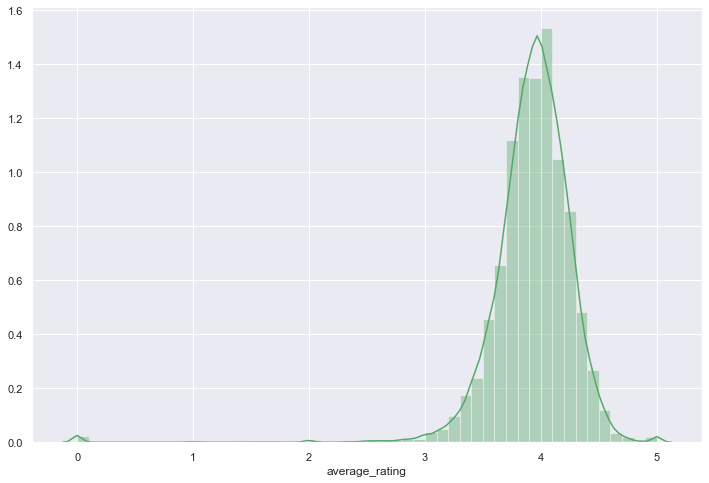

In [32]:
sns.distplot(books.average_rating,color = 'g')

Most of the books have an average rating of 4

## Top 10 books with the most number of pages

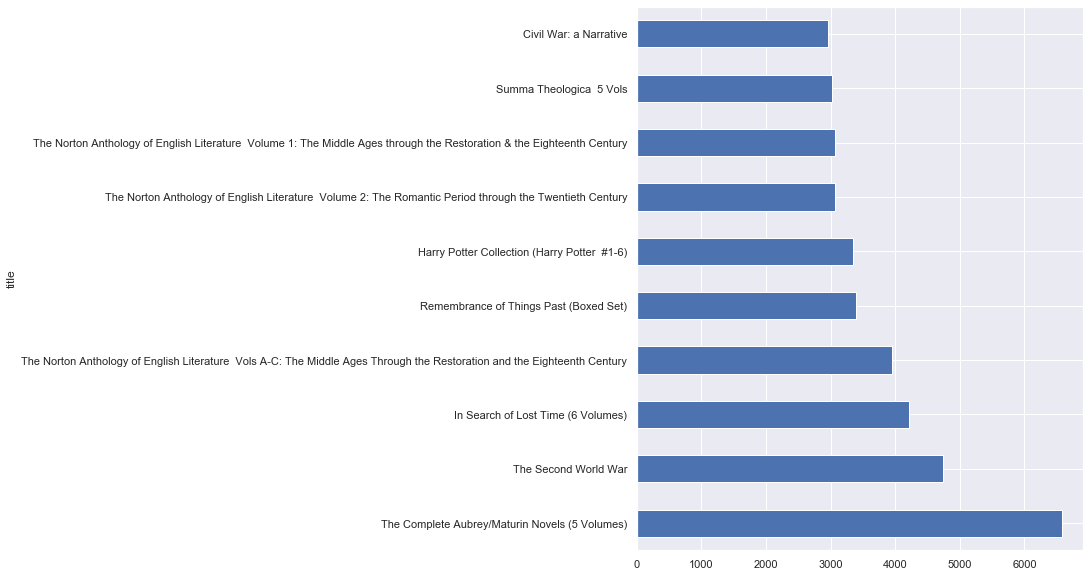

In [33]:
pages_10 = books.sort_values(by = 'Total_pages', ascending = False). head(10).set_index('title')
pages_10.Total_pages.plot(kind = 'barh', figsize = (8,10))

## Top 10 books with most number of text reviews

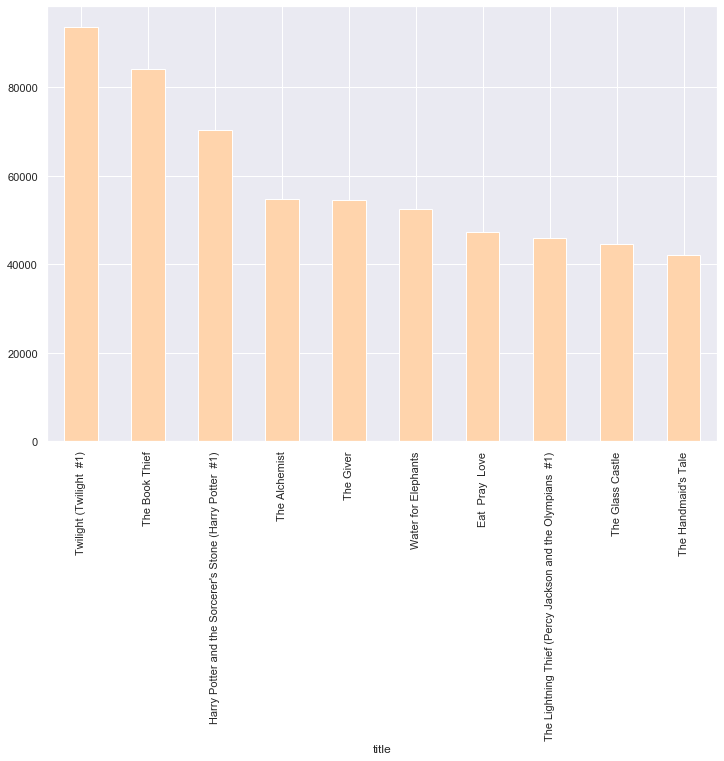

In [34]:
text_10 = books.sort_values(by = 'text_reviews_count', ascending = False).set_index('title').head(10)
text_10.text_reviews_count.plot.bar(colormap = 'icefire_r')

Twilight has the most number of text reviwes.

## Top 5 authors with the most number of text reviews

In [35]:
text = books[['title', 'authors', 'ratings_count', 'text_reviews_count']]
text = text.groupby(['authors'])['text_reviews_count'].sum().sort_values(ascending = False).reset_index()
text.head(10)

,authors,text_reviews_count
0,J.K. Rowling,194336
1,Markus Zusak,96859
2,Stephenie Meyer,94163
3,Stephen King,92444
4,Lois Lowry,83256
5,Jodi Picoult,77961
6,Diana Gabaldon,69340
7,Dan Brown,66760
8,Rick Riordan,66752
9,Neil Gaiman,65244


J.K.Rowling seems to have the most number of text reviews which represent the high popularity of the Harry Potter series. Author with the most number of books 'Agatha Christie' is not even in the top 10 of the above list.

## Top 5 authors with the most number of ratings

In [36]:
rating = books.groupby('authors')['ratings_count'].sum().sort_values(ascending = False).reset_index()
rating.head()

,authors,ratings_count
0,J.K. Rowling,13954740
1,J.R.R. Tolkien,5044183
2,Dan Brown,4416542
3,Stephenie Meyer,4369733
4,Stephen King,4342510


J.K.Rowling also has the most number of ratings count.
This proves that J.K.Rowling seems to be the most favoured author with the most number of ratings and text reviews on Goodreads.